# EDA de Electric and Alternative Fuel Charging Station

## Importamos las librerias necesarias

In [1]:
import os
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


## Cargamos el archivo a analizar

In [91]:
df = pd.read_csv(".\Datasets_clean\Electric_and_Alternative_Fuel_Charging_Stations.csv")

### Revisión del dataset

In [92]:
# Mostrar información general sobre el DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           70406 non-null  object 
 1   Station Name             70406 non-null  object 
 2   Street Address           70405 non-null  object 
 3   City                     70406 non-null  object 
 4   State                    70406 non-null  object 
 5   ZIP                      70405 non-null  object 
 6   Station Phone            65204 non-null  object 
 7   Status Code              70406 non-null  object 
 8   Groups With Access Code  70406 non-null  object 
 9   Access Days Time         66628 non-null  object 
 10  EV Level2 EVSE Num       54144 non-null  float64
 11  EV Network               60907 non-null  object 
 12  EV Network Web           50305 non-null  object 
 13  Geocode Status           70391 non-null  object 
 14  Latitude              

In [85]:
df.sample(3)

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Station Phone,Status Code,Groups With Access Code,Access Days Time,...,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Open Date,EV Connector Types,Country,Access Code
30181,ELEC,Union College - 50 Yard Line Lot,1261 Lenox Rd,Schenectady,NY,12308,866-816-7584,E,Public,24 hours daily,...,GPS,42.816642,-73.924801,2021-05-06,156046,2021-12-06 18:36:15 UTC,2020-05-01,J1772,US,public
69384,ELEC,BEAVERTON CNTRL GRIFFITH #1,4755 SW Griffith Dr,Beaverton,OR,97005,888-758-4389,E,Public,24 hours daily,...,GPS,45.485592,-122.798089,2022-07-25,222555,2022-07-25 01:28:07 UTC,2022-07-07,J1772,US,public
29188,ELEC,CPU EC 2,1200 Fort Vancouver Way Southside Public Park,Vancouver,WA,98663,888-758-4389,E,Public,24 hours daily,...,GPS,45.629460,-122.663366,2022-07-25,154099,2022-07-25 01:05:23 UTC,2020-02-27,J1772,US,public


In [86]:
# Visualizamos las columnas que no se incluyen en la visualización anterior
columnas = ['EV Level2 EVSE Num', 'EV Network', 'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude']
print(df[columnas].sample(3))

       EV Level2 EVSE Num         EV Network  \
2749                  1.0      Non-Networked   
35157                 NaN  Electrify America   
36851                 2.0      Non-Networked   

                          EV Network Web Geocode Status   Latitude   Longitude  
2749                                 NaN          200-9  32.802475 -117.215269  
35157  https://www.electrifyamerica.com/            GPS  37.753967 -122.488667  
36851                                NaN            GPS  34.221087 -118.451275  


Es posible convertir algunas columnas a otro formato de variable para facilitar los análisis estadísticos al formato int:
- ZIP 
- Station Phone
- EV Level2 EVSE Num
- ID   

In [103]:
# Se genera una copia del df original
df2 = df.copy()

In [88]:
columnas_int = ['ZIP', 'Station Phone', 'EV Level2 EVSE Num', 'ID']

for column in columnas_int:
    valores_unicos = df2[column].unique()
    print(f"Valores únicos en la columna '{column}': {valores_unicos}")

Valores únicos en la columna 'ZIP': ['36107' '30303' '30324' ... 'H2Z 1A4' '07732' 'V9A 2A3']
Valores únicos en la columna 'Station Phone': [nan '770-350-3000' '479-783-3188' ... '512-930-6150' '512-228-3428'
 '204-704-5000']
Valores únicos en la columna 'EV Level2 EVSE Num': [ nan  39.   4.  12. 311.  19.  10.   2.  46.  13.   3.   1.  16.  20.
   6.   5.   8.  21.  67.  56.  17.   7.   9.  14.  26.  24.  11.  18.
  32.  44.  51.  38.  28. 156. 123.  40.  25.  37.  41.  30.  15. 100.
  42.  34.  22. 108.  60.  70.  27.  48.  50.  52.  23.  31. 106.  66.
  29.  36. 128.  73.  49.  81.  91.  62.]
Valores únicos en la columna 'ID': [    17     42     45 ... 224380 224381 224382]


La columna 'ZIP' contiene valores numericos y alfanuméricos por lo que no es posible trasformarla a int. 
Los valores de 'Station Phone' contienen un separador, por otro lado se considera por el momento innecesario transformar dichos valores.

In [104]:
# Revisamos los Nan en las columnas seleccionadas
cuenta_nan = df2[columnas_int].isnull().sum()
print("Cantidad de NaN en cada columna:")
print(cuenta_nan)

Cantidad de NaN en cada columna:
ZIP                       1
Station Phone          5202
EV Level2 EVSE Num    16262
ID                        0
dtype: int64


In [105]:
columnas_int2 = ['EV Level2 EVSE Num', 'ID']

# Reemplazar NaN con 0 en las columnas seleccionadas
df2[columnas_int2] = df2[columnas_int2].fillna(0)

# Convertir las columnas a tipo int
df2[columnas_int2] = df2[columnas_int2].astype(int)

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    70406 non-null  object 
 1   Station Name                      70406 non-null  object 
 2   Street Address                    70405 non-null  object 
 3   City                              70406 non-null  object 
 4   State                             70406 non-null  object 
 5   ZIP                               70405 non-null  object 
 6   Station Phone                     65204 non-null  object 
 7   Status Code                       70406 non-null  object 
 8   Groups With Access Code           70406 non-null  object 
 9   Access Days Time                  66628 non-null  object 
 10  EV Level2 EVSE Num                70406 non-null  int32  
 11  EV Network                        60907 non-null  object 
 12  EV N

Podria ser de interés evaluar la conversión a formato de fecha las columnas 'Date Last Confirmed', 'Open Date'

In [106]:
columnas_date = ['Date Last Confirmed', 'Open Date']

In [107]:
cuenta_nan = df2[columnas_date].isnull().sum()
print("Cantidad de NaN en cada columna:")
print(cuenta_nan)

Cantidad de NaN en cada columna:
Date Last Confirmed     218
Open Date              1096
dtype: int64


In [108]:
df2[columnas_date] = df2[columnas_date].fillna(0)

In [109]:
# Convertir las columnas de fecha a formato de fecha
date_columns = ['Date Last Confirmed', 'Open Date']
df2[date_columns] = df2[date_columns].apply(pd.to_datetime, errors='coerce')

In [112]:
# Es posible crear las columnas separadas para el año y el mes de "Date Last Confirmed"
df2['Year Date Last Confirmed'] = df2['Date Last Confirmed'].dt.year.fillna(0).astype(int)
df2['Month Date Last Confirmed'] = df2['Date Last Confirmed'].dt.month.fillna(0).astype(int)

In [113]:
# De forma análoga para el año y el mes de "Open Date"
df2['Year Open Date'] = df2['Open Date'].dt.year.fillna(0).astype(int)
df2['Month Open Date'] = df2['Open Date'].dt.month.fillna(0).astype(int)

In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Fuel Type Code             70406 non-null  object        
 1   Station Name               70406 non-null  object        
 2   Street Address             70405 non-null  object        
 3   City                       70406 non-null  object        
 4   State                      70406 non-null  object        
 5   ZIP                        70405 non-null  object        
 6   Station Phone              65204 non-null  object        
 7   Status Code                70406 non-null  object        
 8   Groups With Access Code    70406 non-null  object        
 9   Access Days Time           66628 non-null  object        
 10  EV Level2 EVSE Num         70406 non-null  int32         
 11  EV Network                 60907 non-null  object        
 12  EV N

In [117]:
# Obtener los valores únicos en las columnas categóricas
categorical_columns = ['Fuel Type Code', 'Status Code', 'Groups With Access Code',
                       'EV Network', 'Geocode Status', 'Country', 'Access Code']
categorical_unique = {col: df2[col].unique() for col in categorical_columns}
print("\nValores únicos en columnas categóricas:")
for col, unique_values in categorical_unique.items():
    print(f"{col}: {unique_values}")



Valores únicos en columnas categóricas:
Fuel Type Code: ['CNG' 'E85' 'ELEC' 'LNG' 'LPG' 'BD' 'HY']
Status Code: ['E' 'T' 'P']
Groups With Access Code: ['Private' 'Public - Card key at all times' 'Private - Government only'
 'Public - Credit card at all times' 'TEMPORARILY UNAVAILABLE (Public)'
 'TEMPORARILY UNAVAILABLE (Public - Credit card at all times)'
 'Private - Fleet customers only' 'Public'
 'Public - Credit card after hours' 'TEMPORARILY UNAVAILABLE (Private)'
 'Private - Card key at all times' 'Public - Call ahead'
 'Public - Card key after hours'
 'TEMPORARILY UNAVAILABLE (Public - Credit card after hours)'
 'TEMPORARILY UNAVAILABLE (Public - Call ahead)'
 'TEMPORARILY UNAVAILABLE (Private - Government only)'
 'PLANNED - not yet accessible (Public - Credit card at all times)'
 'PLANNED - not yet accessible (Private - Government only)'
 'Public - Limited hours' 'PLANNED - not yet accessible (Public)'
 'PLANNED - not yet accessible (Public - Call ahead)'
 'Private - Call ahead

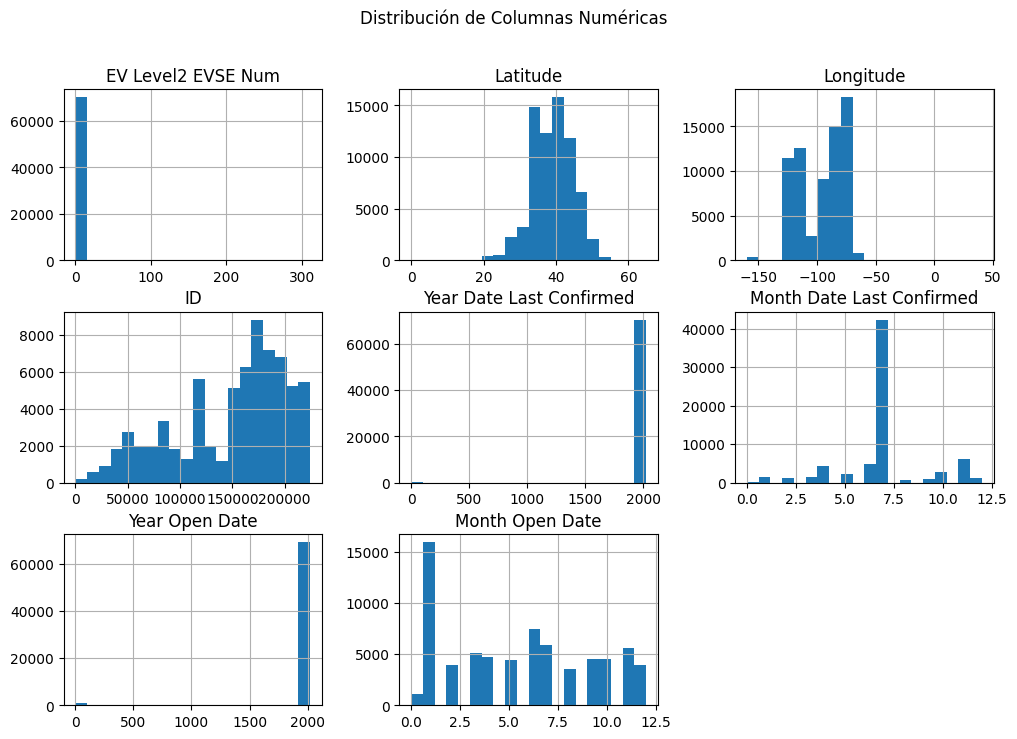

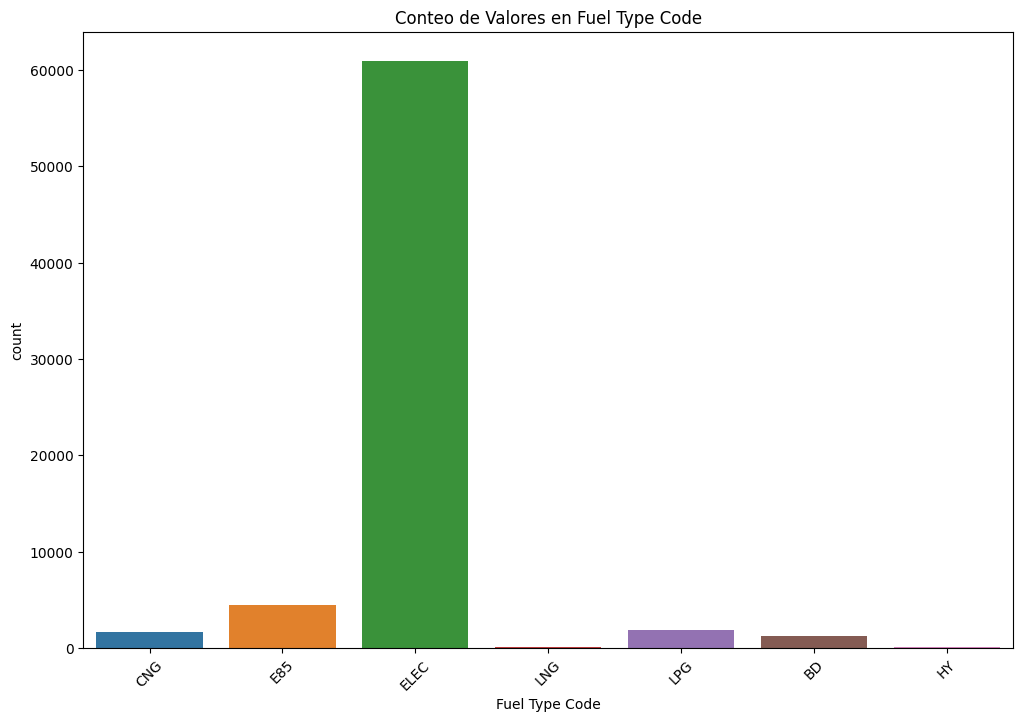

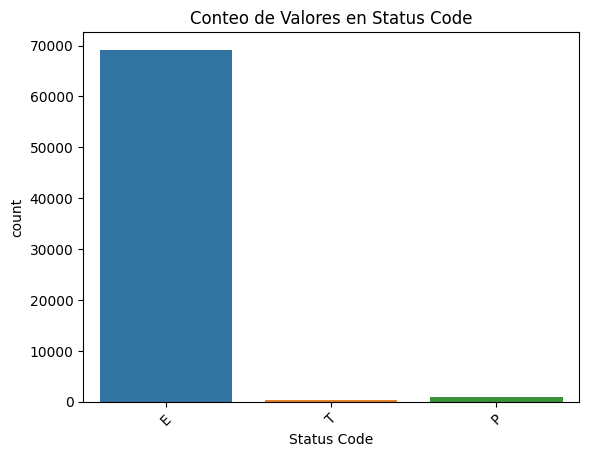

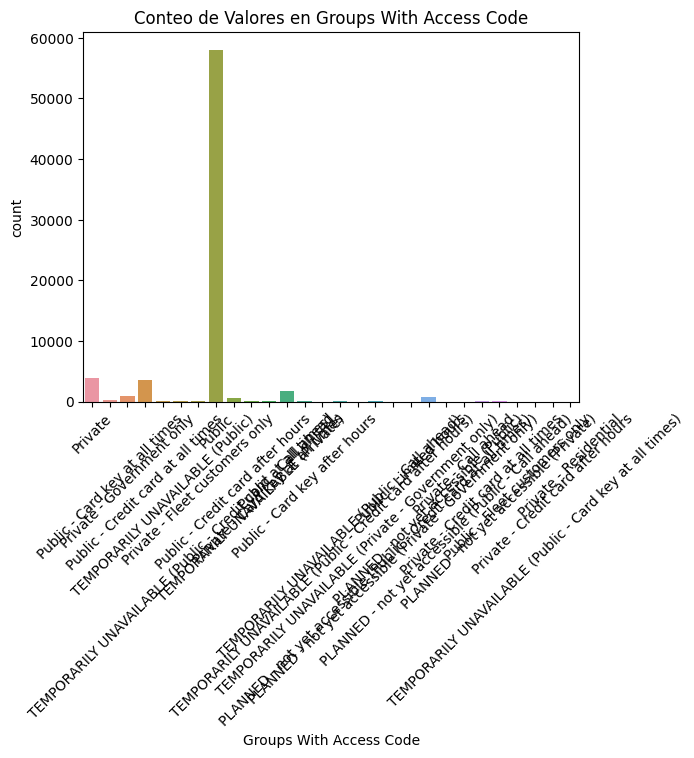

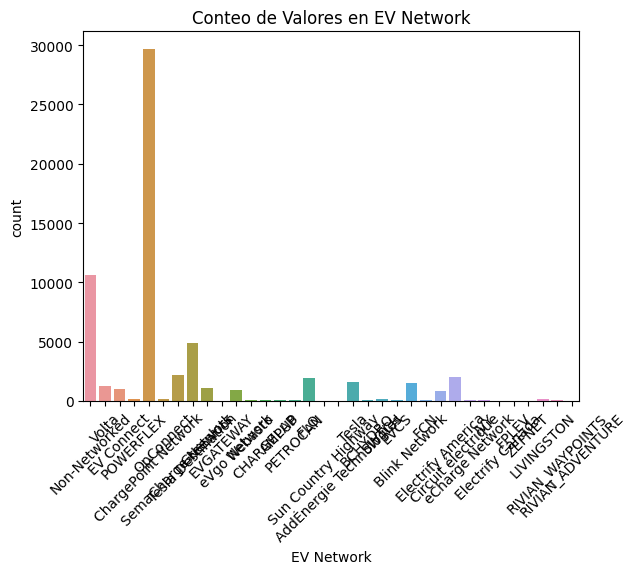

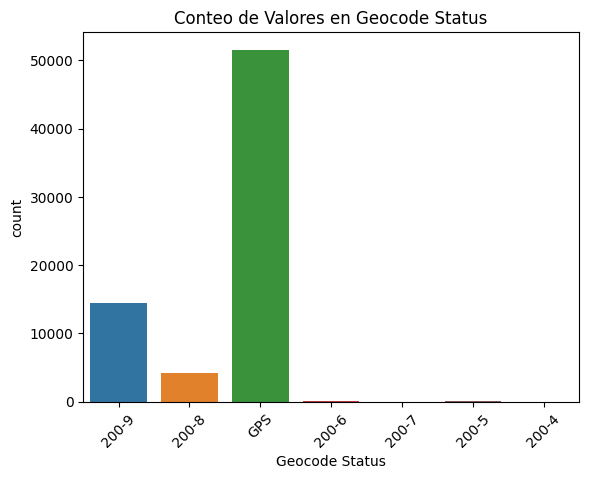

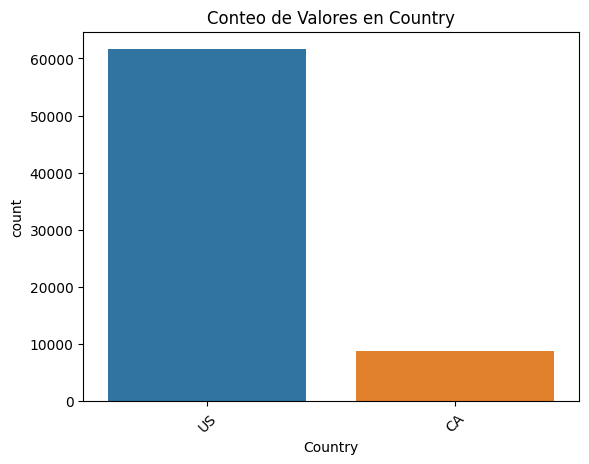

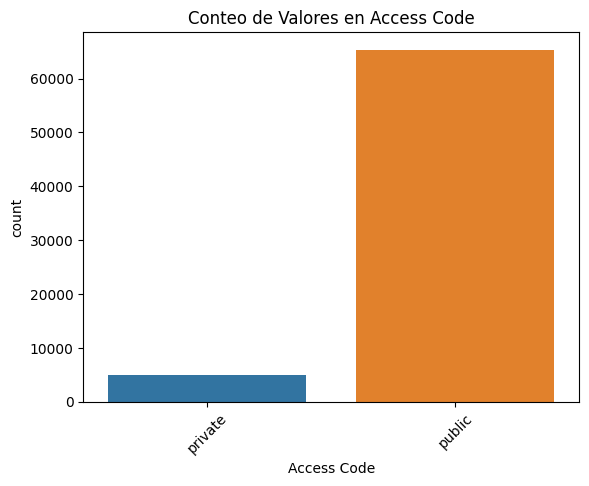

In [118]:
# Seleccionar las columnas numéricas y categóricas para el análisis
numeric_columns = ['EV Level2 EVSE Num', 'Latitude', 'Longitude', 'ID',
                   'Year Date Last Confirmed', 'Month Date Last Confirmed',
                   'Year Open Date', 'Month Open Date']
categorical_columns = ['Fuel Type Code', 'Status Code', 'Groups With Access Code',
                       'EV Network', 'Geocode Status', 'Country', 'Access Code']

# Visualizar histogramas para columnas numéricas
df2[numeric_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribución de Columnas Numéricas")
plt.show()

# Visualizar conteo de valores en columnas categóricas
plt.figure(figsize=(12, 8))
for col in categorical_columns:
    sns.countplot(data=df2, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Conteo de Valores en {col}")
    plt.show()

In [116]:
df2.describe()

,EV Level2 EVSE Num,Latitude,Longitude,Date Last Confirmed,ID,Open Date,Year Date Last Confirmed,Month Date Last Confirmed,Year Open Date,Month Open Date
count,70406.000000,70406.000000,70406.000000,70188,70406.000000,69310,70406.000000,70406.000000,70406.000000,70406.000000
mean,1.780516,38.929309,-96.061447,2022-02-26 08:14:09.375962112,148730.326066,2019-01-15 22:20:58.831337472,2015.354856,6.940886,1987.196674,5.500156
min,0.000000,0.000000,-159.788556,2017-05-11 00:00:00,17.000000,1974-11-15 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,34.182981,-117.860563,2021-11-04 00:00:00,113723.250000,2017-12-15 00:00:00,2021.000000,7.000000,2017.000000,2.000000
50%,2.000000,39.105989,-92.002897,2022-07-25 00:00:00,165247.500000,2020-07-10 00:00:00,2022.000000,7.000000,2020.000000,6.000000
75%,2.000000,42.702185,-78.881493,2022-07-25 00:00:00,190653.750000,2021-05-15 00:00:00,2022.000000,7.000000,2021.000000,9.000000
max,311.000000,64.852466,40.432278,2022-07-25 00:00:00,224382.000000,2022-10-15 00:00:00,2022.000000,12.000000,2022.000000,12.000000
std,2.935752,5.628458,19.545273,NaN,54261.672118,NaN,112.320682,2.200399,249.923499,3.699276


In [25]:
# Columnas a convertir a int
int_columns = ['ID', 'Station Phone']
df[int_columns] = df[int_columns].astype(int)

# Columnas a convertir a float
float_columns = ['EV Level2 EVSE Num', 'Latitude', 'Longitude']
df[float_columns] = df[float_columns].astype(float)

# Mostrar los tipos de datos después de la conversión
print(df.dtypes)

Fuel Type Code                       object
Station Name                         object
Street Address                       object
City                                 object
State                                object
ZIP                                  object
Station Phone                        object
Status Code                          object
Groups With Access Code              object
Access Days Time                     object
EV Level2 EVSE Num                  float64
EV Network                           object
EV Network Web                       object
Geocode Status                       object
Latitude                            float64
Longitude                           float64
Date Last Confirmed                  object
ID                                    int32
Updated At                           object
Open Date                            object
EV Connector Types                   object
Country                              object
Groups With Access Code (French)

In [27]:
# Mostrar un resumen estadístico del DataFrame
df.describe()

,EV Level2 EVSE Num,Latitude,Longitude,ID,Year,Month
count,54144.000000,70406.000000,70406.000000,70406.000000,69310.000000,69310.000000
mean,2.315289,38.929309,-96.061447,148730.326066,2018.620242,5.587130
std,3.157387,5.628458,19.545273,54261.672118,4.038681,3.662663
min,1.000000,0.000000,-159.788556,17.000000,1974.000000,1.000000
25%,2.000000,34.182981,-117.860563,113723.250000,2017.000000,2.000000
50%,2.000000,39.105989,-92.002897,165247.500000,2020.000000,6.000000
75%,2.000000,42.702185,-78.881493,190653.750000,2021.000000,9.000000
max,311.000000,64.852466,40.432278,224382.000000,2022.000000,12.000000


In [16]:
# Conteo de valores únicos en la columna "Fuel Type Code"
fuel_type_counts = df['Fuel Type Code'].value_counts()
print(fuel_type_counts)

Fuel Type Code
ELEC    60907
E85      4508
LPG      1867
CNG      1631
BD       1218
LNG       158
HY        117
Name: count, dtype: int64


In [18]:
# Filtrar filas donde el Estado sea "CA" (California)
#ca_stations = df[df['State'] == 'CA']
#print(ca_stations)

# Seleccionar columnas específicas
selected_columns = ['Station Name', 'City', 'State']
selected_data = df[selected_columns]
print(selected_data)


                                       Station Name         City State
0              Spire - Montgomery Operations Center   Montgomery    AL
1                               PS Energy - Atlanta      Atlanta    GA
2      Metropolitan Atlanta Rapid Transit Authority      Atlanta    GA
3                             United Parcel Service      Atlanta    GA
4                        Arkansas Oklahoma Gas Corp   Fort Smith    AR
...                                             ...          ...   ...
70401                     SCHLITZ PARK SCHLITZ PARK    Milwaukee    WI
70402                          NEXUS EAST STATION 2       Austin    TX
70403                                       Raley's       Loomis    CA
70404                           13601 Glenoaks blvd  Los Angeles    CA
70405                            6723 Van Nuys blvd  Los Angeles    CA

[70406 rows x 3 columns]


In [20]:
# Agrupar por Estado y contar la cantidad de estaciones en cada Estado
stations_by_state = df.groupby('State')['Station Name'].count()
print(stations_by_state)

# Calcular el promedio de EV Level2 EVSE Num por Estado
avg_ev_level2_per_state = df.groupby('State')['EV Level2 EVSE Num'].mean()
print(avg_ev_level2_per_state)


State
AB     480
AK      58
AL     409
AR     312
AZ    1104
      ... 
WA    1916
WI     796
WV     156
WY      93
YT      30
Name: Station Name, Length: 65, dtype: int64
State
AB    2.166667
AK    1.617021
AL    2.181132
AR    2.556818
AZ    2.259694
        ...   
WA    2.164627
WI    1.997436
WV    2.315789
WY    1.925926
YT    2.500000
Name: EV Level2 EVSE Num, Length: 65, dtype: float64


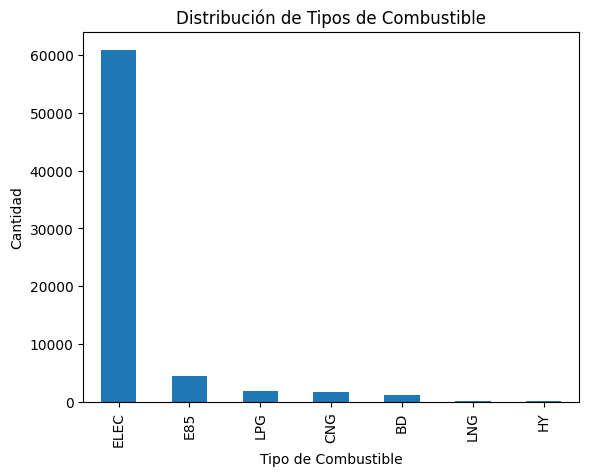

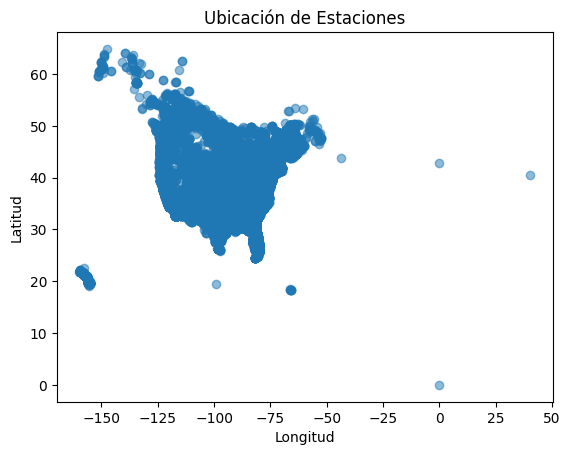

In [21]:
import matplotlib.pyplot as plt

# Graficar la distribución de tipos de combustible
fuel_type_counts.plot(kind='bar')
plt.title('Distribución de Tipos de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad')
plt.show()

# Graficar la ubicación de las estaciones en un scatter plot
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5)
plt.title('Ubicación de Estaciones')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


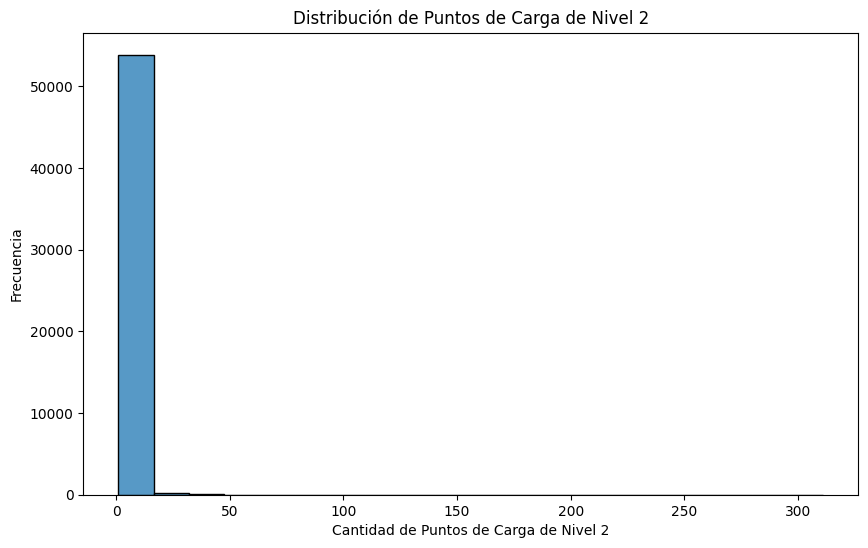

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de puntos de carga de nivel 2
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='EV Level2 EVSE Num', bins=20)
plt.xlabel('Cantidad de Puntos de Carga de Nivel 2')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntos de Carga de Nivel 2')
plt.show()


In [19]:
# Conteo de valores faltantes por columna
missing_values = df.isnull().sum()
print(missing_values)


Fuel Type Code                          0
Station Name                            0
Street Address                          1
City                                    0
State                                   0
ZIP                                     1
Station Phone                        5202
Status Code                             0
Groups With Access Code                 0
Access Days Time                     3778
EV Level2 EVSE Num                  16262
EV Network                           9499
EV Network Web                      20101
Geocode Status                         15
Latitude                                0
Longitude                               0
Date Last Confirmed                   218
ID                                      0
Updated At                              0
Open Date                            1096
EV Connector Types                   9716
Country                                 0
Groups With Access Code (French)        0
Access Code                       

In [26]:
# Mostrar un resumen estadístico del DataFrame
df.describe()

,EV Level2 EVSE Num,Latitude,Longitude,ID,Year,Month
count,54144.000000,70406.000000,70406.000000,70406.000000,69310.000000,69310.000000
mean,2.315289,38.929309,-96.061447,148730.326066,2018.620242,5.587130
std,3.157387,5.628458,19.545273,54261.672118,4.038681,3.662663
min,1.000000,0.000000,-159.788556,17.000000,1974.000000,1.000000
25%,2.000000,34.182981,-117.860563,113723.250000,2017.000000,2.000000
50%,2.000000,39.105989,-92.002897,165247.500000,2020.000000,6.000000
75%,2.000000,42.702185,-78.881493,190653.750000,2021.000000,9.000000
max,311.000000,64.852466,40.432278,224382.000000,2022.000000,12.000000


In [23]:
# Convertir la columna 'Open Date' a formato de fecha
df['Open Date'] = pd.to_datetime(df['Open Date'])

# Convertir la columna 'Status Code' a categoría
df['Status Code'] = df['Status Code'].astype('category')


In [24]:
# Extraer el año y el mes de la columna 'Open Date'
df['Year'] = df['Open Date'].dt.year
df['Month'] = df['Open Date'].dt.month

# Conteo de estaciones abiertas por año
stations_per_year = df['Year'].value_counts().sort_index()
print(stations_per_year)


Year
1974.0        1
1978.0        1
1980.0        2
1983.0        1
1984.0        1
1985.0        2
1986.0        1
1987.0       12
1988.0        4
1989.0        5
1990.0        4
1991.0        9
1992.0       11
1993.0       12
1994.0       10
1995.0       25
1996.0       88
1997.0       38
1998.0       38
1999.0      146
2000.0      316
2001.0       49
2002.0       69
2003.0      111
2004.0       65
2005.0      157
2006.0      216
2007.0      262
2008.0      304
2009.0      329
2010.0      305
2011.0     1325
2012.0     1984
2013.0     1148
2014.0     1589
2015.0     2778
2016.0     2944
2017.0     3048
2018.0     3864
2019.0     7026
2020.0    10170
2021.0    22048
2022.0     8792
Name: count, dtype: int64
